# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-09-25 00:00:20--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-09-25 00:00:20--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
data.dropna(inplace=True)
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [57]:
unique_countries = data['Country'].unique()
print("Unique countries in the dataset:")
for country in unique_countries:
    print(country)

Unique countries in the dataset:
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Austria
Israel
Finland
Greece
Singapore
Lebanon
United Arab Emirates
Saudi Arabia
Czech Republic
Canada
Unspecified
Brazil
USA
European Community
Bahrain
Malta
RSA


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [8]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848


In [9]:
data.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head()

,UnitPrice
Country,
Singapore,109.645808
Portugal,8.736392
Cyprus,6.302363
Canada,6.030331
Norway,6.012026


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [10]:
data['StockCode'].value_counts().head(10)

,count
StockCode,
85123A,2077
22423,1905
85099B,1662
84879,1418
47566,1416
20725,1359
22720,1232
POST,1196
20727,1126


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [19]:
TotalPrice = data['Quantity'] * data['UnitPrice']
data['TotalPrice'] = TotalPrice
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
data.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

<Axes: xlabel='InvoiceDate'>

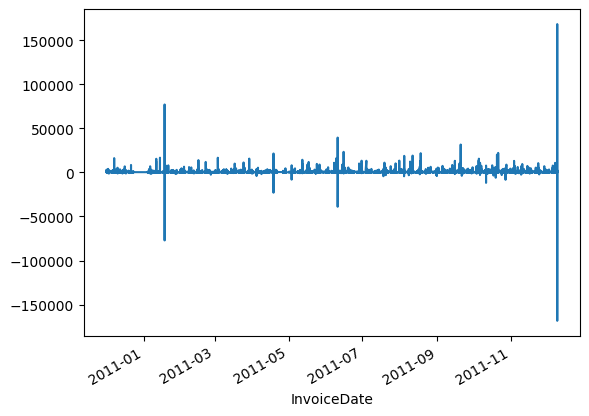

In [12]:
data.groupby('InvoiceDate')['TotalPrice'].sum().plot()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

<Axes: title={'center': 'UnitPrice'}, xlabel='Country'>

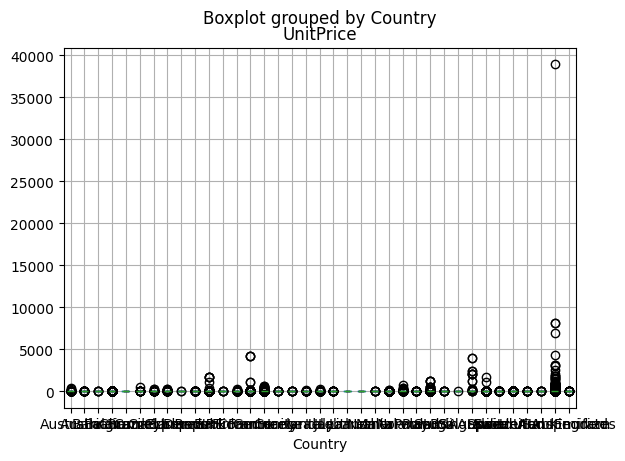

In [13]:
data.boxplot(column='UnitPrice', by='Country')

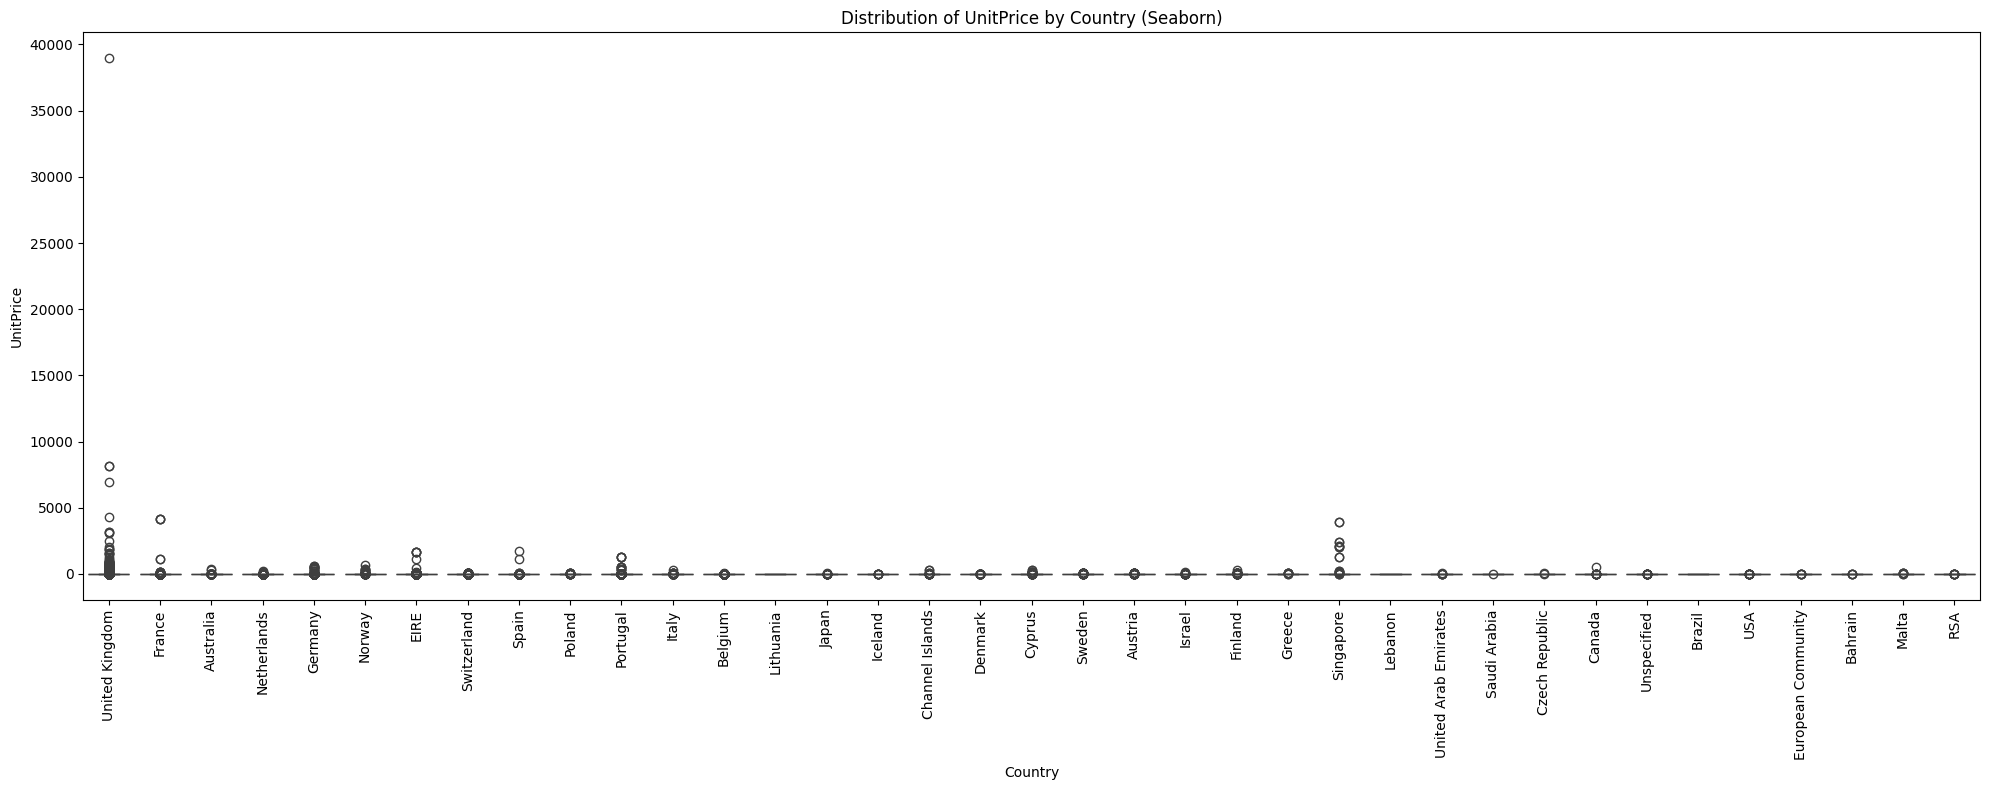

In [15]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title('Distribution of UnitPrice by Country (Seaborn)')
plt.ylabel('UnitPrice')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

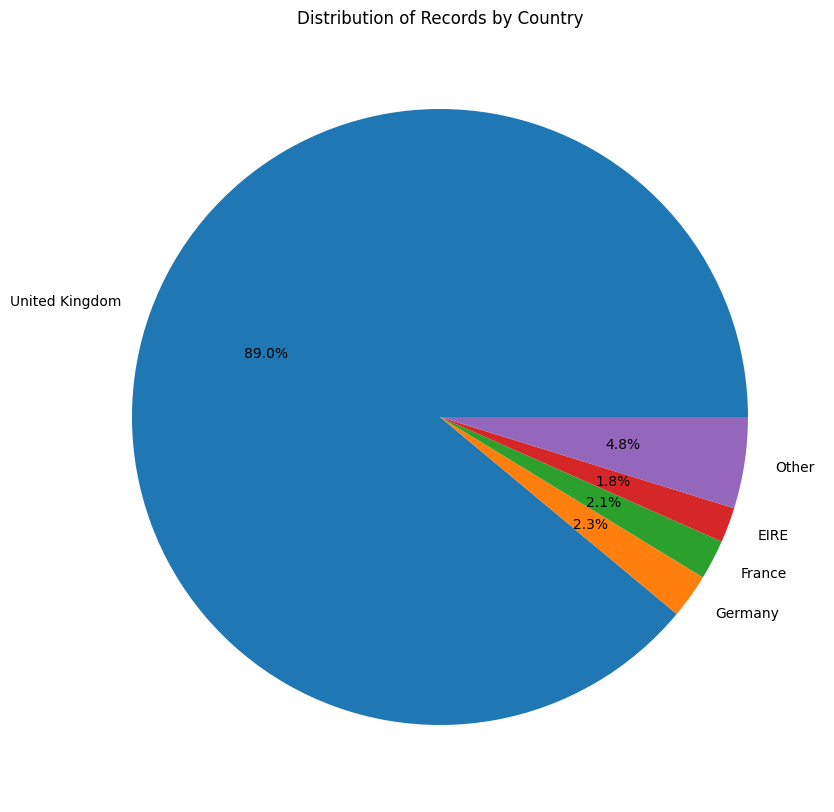

In [17]:
country_counts = data['Country'].value_counts()

# Filter out countries with very small percentages
threshold = 0.01 # Adjust threshold as needed
country_counts_filtered = country_counts[country_counts / country_counts.sum() > threshold]
other_countries = country_counts[country_counts / country_counts.sum() <= threshold].sum()
country_counts_filtered['Other'] = other_countries

plt.figure(figsize=(10, 10))
plt.pie(country_counts_filtered, labels=country_counts_filtered.index, autopct='%1.1f%%')
plt.title('Distribution of Records by Country')
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

In [21]:
data.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head()

,UnitPrice
Country,
Singapore,109.645808
Portugal,8.736392
Cyprus,6.302363
Canada,6.030331
Norway,6.012026


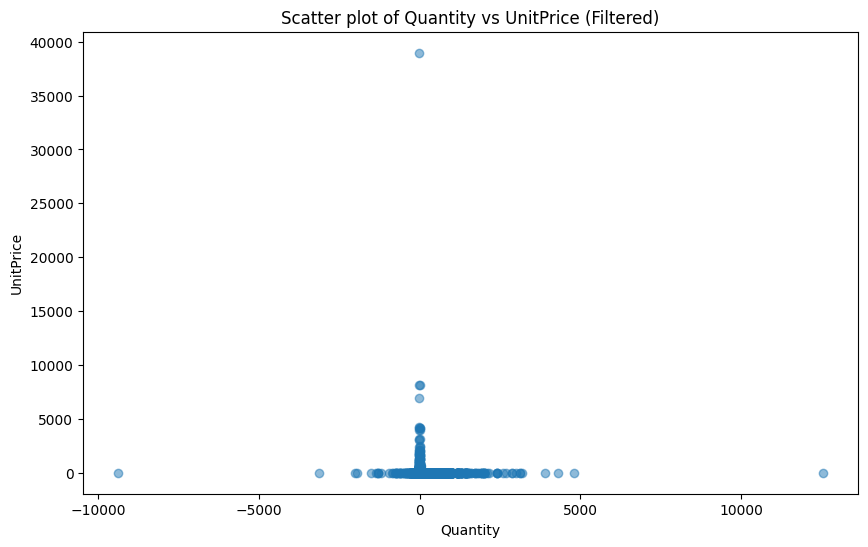

In [26]:
# Filter data to exclude Quantity values outside the specified range
filtered_data = data[(data['Quantity'] >= -20000) & (data['Quantity'] <= 20000)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Quantity'], filtered_data['UnitPrice'], alpha=0.5)
plt.title('Scatter plot of Quantity vs UnitPrice (Filtered)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

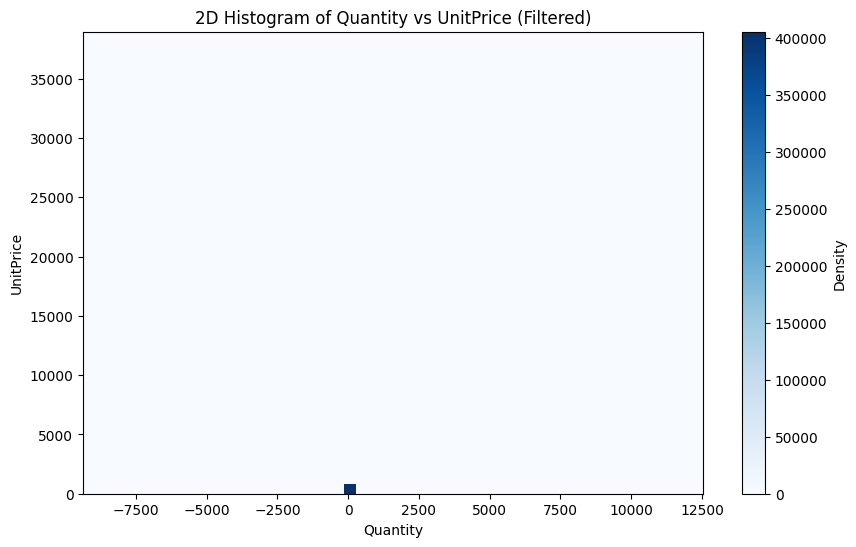

In [41]:
plt.figure(figsize=(10, 6))
plt.hist2d(filtered_data['Quantity'], filtered_data['UnitPrice'] , bins=50, cmap='Blues')
plt.colorbar(label='Density')
plt.title('2D Histogram of Quantity vs UnitPrice (Filtered)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

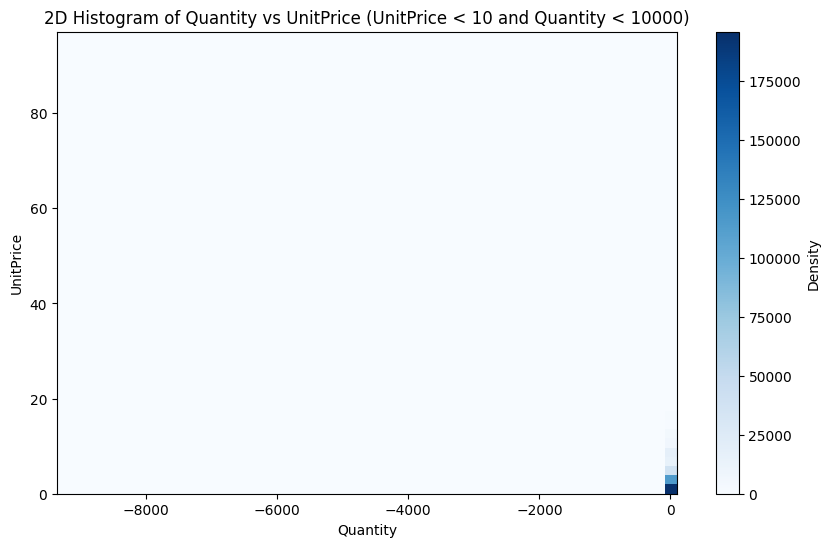

In [47]:
# Filter data to exclude UnitPrice values >= 2000 and Quantity values outside the specified range
filtered_data_price = filtered_data[(filtered_data['UnitPrice'] < 100) & (filtered_data['Quantity'] < 100)]

plt.figure(figsize=(10, 6))
plt.hist2d(filtered_data_price['Quantity'], filtered_data_price['UnitPrice'], bins=50, cmap='Blues')
plt.colorbar(label='Density')
plt.title('2D Histogram of Quantity vs UnitPrice (UnitPrice < 10 and Quantity < 10000)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

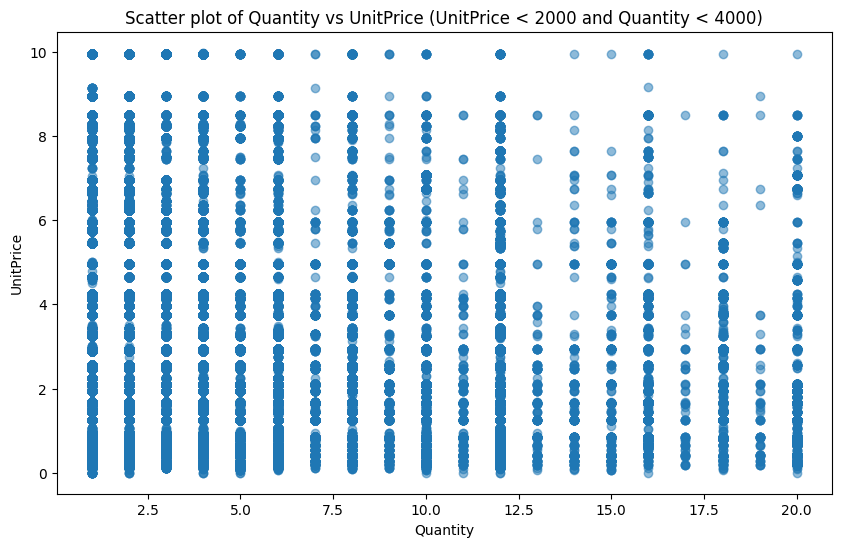

In [50]:
# Filter data with specified conditions for scatter plot
filtered_data_scatter = data[(data['Quantity'] >= 0) & (data['Quantity'] <= 20) & (data['UnitPrice'] < 10) & (data['Quantity'] < 10000)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_scatter['Quantity'], filtered_data_scatter['UnitPrice'], alpha=0.5)
plt.title('Scatter plot of Quantity vs UnitPrice (UnitPrice < 2000 and Quantity < 4000)')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [51]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848


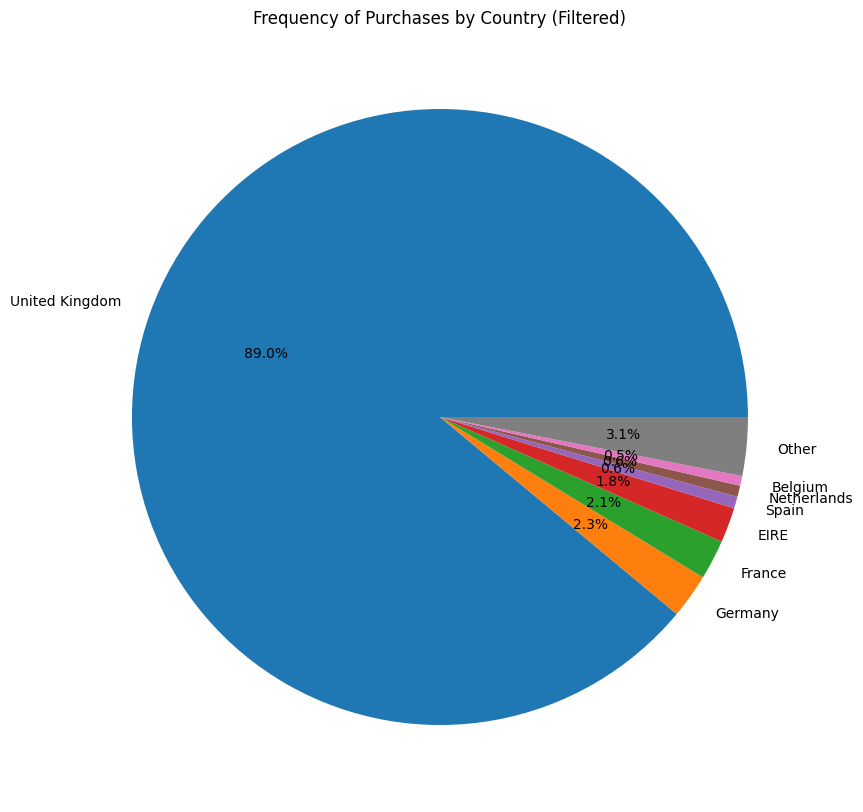

In [54]:
country_counts = data['Country'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Purchases by Country')
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

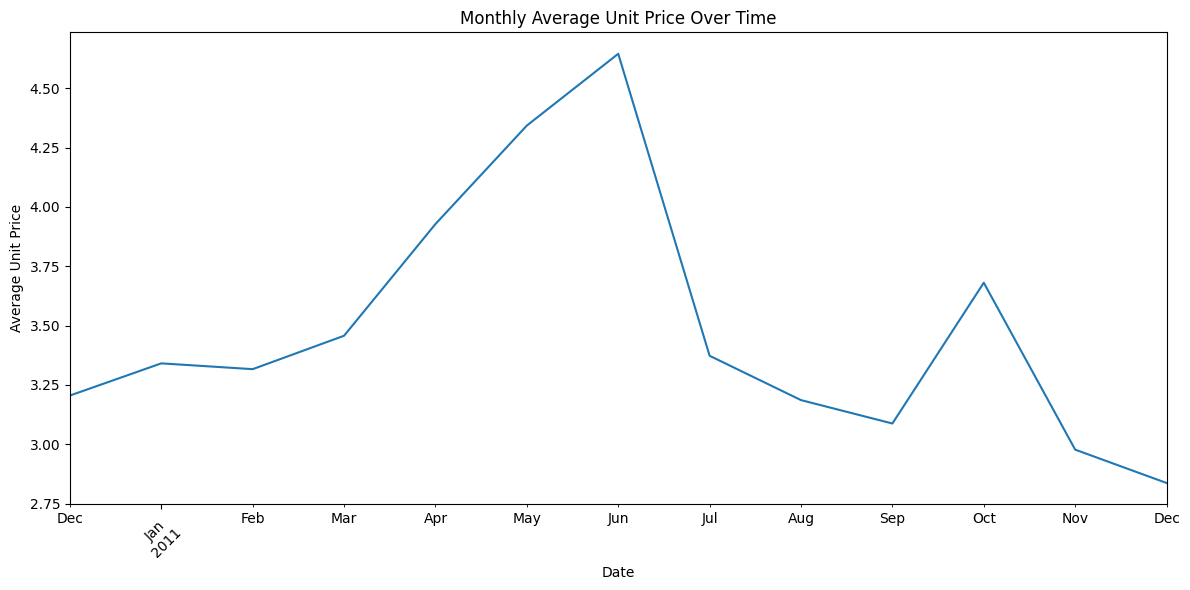

In [58]:
# Extract month and year from InvoiceDate
data['InvoiceMonthYear'] = data['InvoiceDate'].dt.to_period('M')

# Group by month and year and calculate the mean UnitPrice
monthly_avg_price = data.groupby('InvoiceMonthYear')['UnitPrice'].mean()

# Plot the monthly average unit price
plt.figure(figsize=(12, 6))
monthly_avg_price.plot()
plt.title('Monthly Average Unit Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

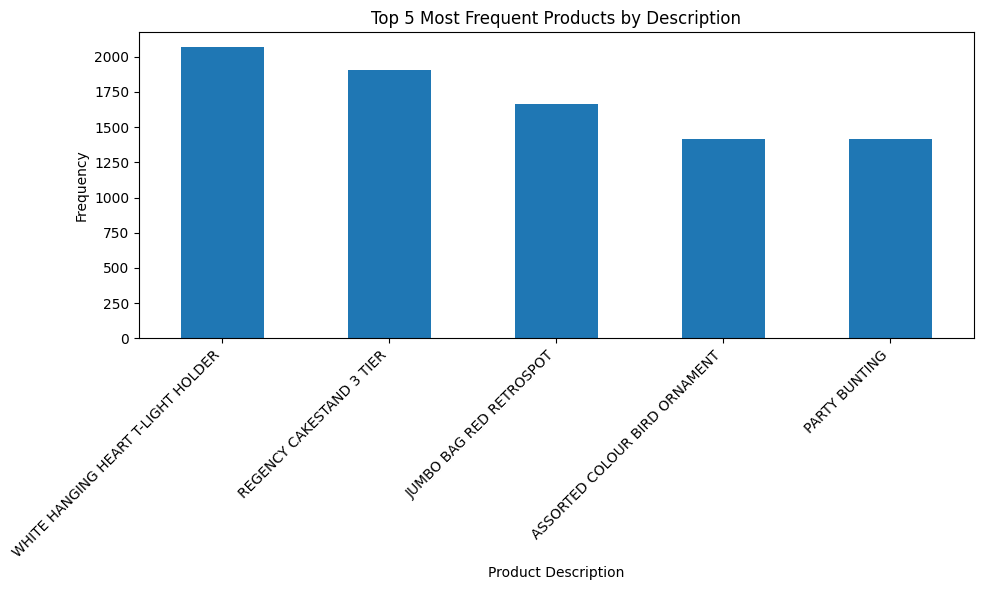

In [59]:
# Group by Description and count the frequency
description_counts = data['Description'].value_counts()

# Get the top 5 most frequent products
top_5_descriptions = description_counts.head(5)

# Visualize the top 5 most frequent products with a vertical bar chart
plt.figure(figsize=(10, 6))
top_5_descriptions.plot(kind='bar')
plt.title('Top 5 Most Frequent Products by Description')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.